## Hypothesis testing exercises

### Overview

- For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

- Null hypothesis: The network latency has not gone up since we switched internet service providers or has decreased

- Alternate hypthesis: The network latency has gone up since we switched internet service providers

- True positive: I test and verify that indeed the network latency has gone up

- True negative: I test and verify that indeed the network latency has not gone up

- Type I error: I stipulate that the network latency has gone up and find out that is has not gone up

- Type II error: I stipulate that the network latency has not gone up when in fact it has gone up

#### 2. Is the website redesign any good?

- Null hypothese: The website redesign is still the same
- Alternate hypthesis: The website redesign is better than before
- True positive: I test and verify that the website redesign is still the same
- True negative: I test and verify that indeed the website redesign is better
- Type I error: I stipulate that the website redesign is better than before when in fact it is not
- Type II error: I stipulate that the website redesign is the same but it is better than before

#### 3. Is our television ad driving more sales?

- Null hypothese: Our television ad is not driving more sales
- Alternate hypthesis: Our television ad is driving more sales
- True positive: I test and verify that our television ad is not driving more sales
- True negative: I test and verify that our television ad is driving more sales
- Type I error: I stipulate that our television ad is driving more sales when in fact it is not
- Type II error: I stipulate that our television ad is not driving more sales but it does

### T-Test

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- Null Hypothesis H0 ====> μa==μb ====> The average time to sell homes is the same for its two offices

- Alternative Hypothesis (2-tail, significantly different)	Ha ====> μa!=μb The average time to sell homes is different for its two offices

#### Assumptions verifcation

- Independent Samples. No observations in office A exist in office B.

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT). YES! Plenty of observations

- Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal).

In [3]:
alpha = .05

In [4]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p
# Null hypthesis rejected because p < alpha
# The average time to sell homes is different for its two offices

(-2.7091418459143854, 0.00811206270346016)

#### 2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

##### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- Null Hypothesis H0 ====> μa==μb ====> There is no difference in fuel-efficiency in cars from 2008 vs 1999

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb There is a difference in fuel-efficiency in cars from 2008 vs 1999

    ##### Assumptions verification

- Independent Samples. No observations in year 1999 exist in year 2008

- At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

- Close Variances

In [7]:
from pydataset import data
mpg = data('mpg')

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
mpg['fuel_efcy'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [14]:
fe_2008 = mpg[mpg.year == 2008].fuel_efcy
fe_1999 = mpg[mpg.year == 1999].fuel_efcy

<AxesSubplot:>

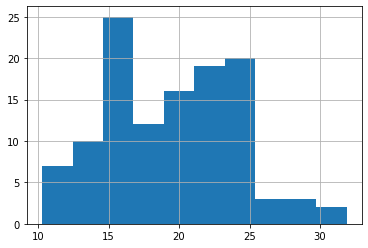

In [18]:
fe_2008.hist()

<AxesSubplot:>

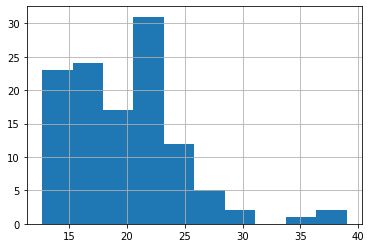

In [19]:
fe_1999.hist()

In [38]:
alpha = .05

In [39]:
print(y1_sample.var())
print(y2_sample.var())

27.122605363984682
24.097480106100797


In [23]:
# Verifying the variances
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [40]:
t, p = stats.ttest_ind(y1_sample, y2_sample, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

In [20]:
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [21]:
p > alpha

True

In [ ]:
# I cannot reject the null hypothesis therefore there is no difference in fuel-efficiency in cars from 2008 vs 1999

##### b. Are compact cars more fuel-efficient than the average car?

- Null Hypothesis H0 ====> μa==μb ====> Compact cars are not more fuel-efficient than the average car

- Alternative Hypothesis (2-tail, significantly different) Ha ====> μa!=μb Compact cars are more fuel-efficient than the average car

#### Assumptions verification
Independent Samples. No observations in year 1999 exist in year 2008

At least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear.

Unequal Variances

In [36]:
alpha = 0.5

In [37]:
fe_compact = mpg[mpg['class'] == 'compact'].fuel_efcy
fe_compact.head()

1    22.212766
2    24.360000
3    24.313725
4    24.705882
5    19.809524
Name: fuel_efcy, dtype: float64

In [54]:
compact_pop_avg = fe_compact.mean()
compact_pop_avg

23.500416808701296

<AxesSubplot:>

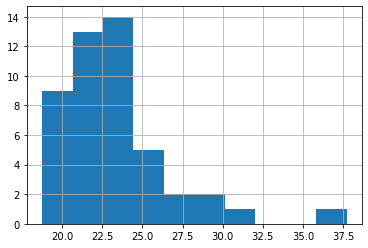

In [39]:
fe_compact.hist()

In [56]:
t, p = stats.ttest_1samp(fe_compact, compact_pop_avg)
t, p

(6.817370168225931e-15, 0.9999999999999947)

In [42]:
p/2 < alpha

True

In [ ]:
# I can reject the null hypothesis
# Compact cars do have a better fuel efficiency than normal cars

#### c.  Do manual cars get better gas mileage than automatic cars?

In [43]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [50]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [58]:
mpg["trans"] = np.where(mpg['trans'].str.contains('auto'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efcy
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,19.809524


In [60]:
mpg.trans.value_counts()

auto      157
manual     77
Name: trans, dtype: int64

In [62]:
fe_auto = mpg[(mpg.trans == 'auto')].fuel_efcy
fe_manual = mpg[(mpg.trans == 'manual')].fuel_efcy

<AxesSubplot:>

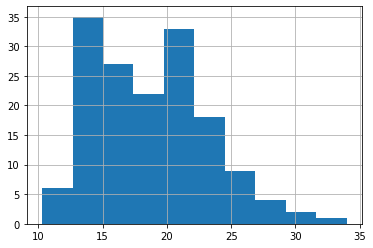

In [63]:
fe_auto.hist()

<AxesSubplot:>

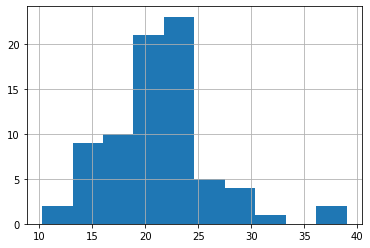

In [64]:
fe_manual.hist()

In [65]:
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [66]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [77]:
p/2 < alpha

True

In [78]:
# I can reject the null hypothesis
# Compact cars do have a better fuel efficiency than normal cars